In [ ]:
import numpy as np
import numpy.matlib as mlb
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.fftpack as sfft
import cv2
import cis

In [ ]:
G = cv2.imread('/root/book_files/image/cyclist-394274_960_720.jpg',0)
plt.imshow(G,cmap='gray')
plt.show()

h, w = G.shape
print(h)
fftsize = max(h, w)

In [ ]:
# フィルタ設計
x = np.array([np.arange(0, 1, 1/h)]).T

# xが1/h刻みなので, 16/h で1周するsin波を作成すれば良いので, f=h/16 とする.
tmp = (np.sin(2*np.pi*(h/16)*x)+1)*16
plt.plot(tmp)
plt.show()
hp= mlb.repmat(np.uint8(tmp), 1, w) # 列ベクトルを横方向にコピー

In [ ]:
plt.imshow(np.uint8(hp)+np.mean(G), cmap='gray')
plt.show()
x1 = np.uint8((np.float16(G)+np.float16(hp))/
             (float(np.max(G))+float(np.max(hp)))*255)
plt.imshow(x1,cmap='gray')

In [ ]:
z = sfft.fftshift(sfft.fft2(x1, (fftsize, fftsize)))  # 2次元FFT
cis.mesh(np.log(np.abs(z))) # plotlyでplot

ピークの値が多少テキストと異なる(多分ノイズの作り方間違ってる😔) が, グラフから判断し以下の周波数をカットすることにする.

$x=480$は共通で,  

+ $y=418$ から $424$ 
+ $y=535$ から $542$

In [ ]:
A = np.ones((fftsize,fftsize))
A[418:424,480] = 0
A[535:543, 480]=0

# 除去できてるか確認のためプロット
cis.mesh(np.log(np.abs(z*A)))

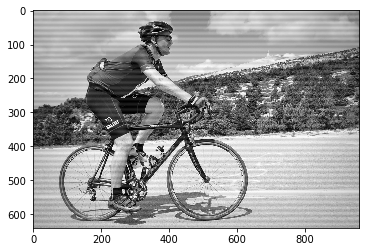

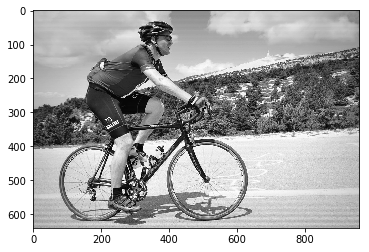

In [64]:
plt.imshow(x1,cmap='gray')
plt.show()
G2 = np.uint8(np.abs(sfft.ifft2(sfft.fftshift(z*A))))
plt.imshow(G2[:h,:w],cmap='gray')
plt.show()

ノイズが軽減できている事がわかる.

### 考察

ノイズの周波数を 0 にしてカットしたが, 周囲の周波数の値から なめらかにつながるようにフィルタリングすることができたら, もっと綺麗にノイズ除去ができるのだろうか？